In [9]:
import pandas as pd
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

iris = pd.read_csv('./final_csv/reduced_iris.csv')
raisin = pd.read_csv('./final_csv/reduced_raisin.csv')

Number of columns: 5
Accuracy: 0.97
Cross-Validation Scores: [0.97, 0.95, 0.95, 1.0]

Raisin Column: majoraxislength  --  SepalLengthCm 


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0     442.246011           3.5            1.4           0.2  Iris-setosa
1     406.690687           3.0            1.4           0.2  Iris-setosa
2     442.267048           3.2            1.3           0.2  Iris-setosa
3     286.540559           3.1            1.5           0.2  Iris-setosa
4     352.190770           3.6            1.4           0.2  Iris-setosa
Accuracy: 0.45
Cross-Validation Scores: [0.5, 0.55, 0.51, 0.43]

Raisin Column: perimeter  --  SepalWidthCm 


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0     442.246011      1184.040            1.4           0.2  Iris-setosa
1     406.690687      1121.786            1.4           0.2  Iris-setosa
2     442.267048      1208.575            1.3           0.2  Iris-setosa
3     286.540559    

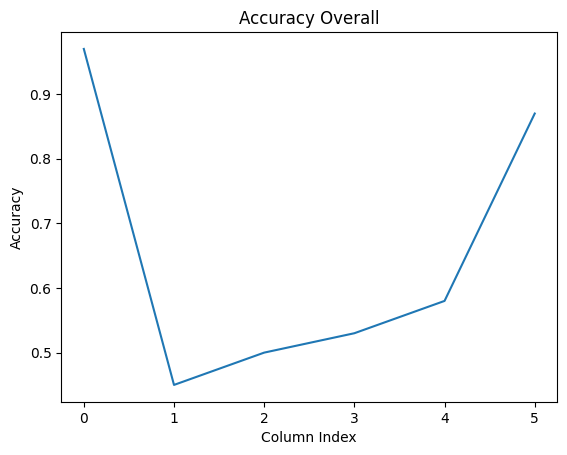

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils   

num_columns = iris.shape[1]
print("Number of columns:", num_columns)

iris = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
raisin = raisin[['majoraxislength', 'perimeter', 'convexarea', 'area', 'class']]

iris_columns = iris.columns
raisin_columns = raisin.columns

accuracy_overall = []

data = iris

X = data.drop('Species', axis=1)
y = data['Species']
#  usar stratified kfold
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
accuracy_overall.append(accuracy)
#f1_score = round(metrics.f1_score(y_test, y_pred), 2)
#auc_score = round(roc_auc_score(y_test, y_pred), 2)
cross_val_scores = cross_val_score(knn_classifier, X, y, cv=4)
cross_val_scores = [round(score, 2) for score in cross_val_scores]


print("Accuracy:", accuracy)
#print("F1 Score:", f1_score)
#print("AUC Score:", auc_score)
print("Cross-Validation Scores:", cross_val_scores)

for index in range(num_columns):
    print("\nRaisin Column:", raisin_columns[index], " -- ", iris_columns[index], "\n\n")
    data[iris_columns[index]] = raisin[raisin_columns[index]]

    print(data.head())

    X = data.drop('Species', axis=1)
    y = data['Species']

    #  usar stratified kfold
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

    knn_classifier = KNeighborsClassifier()

    # Train the classifier
    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
    accuracy_overall.append(accuracy)
    #f1_score = round(metrics.f1_score(y_test, y_pred), 2)
    #auc_score = round(roc_auc_score(y_test, y_pred), 2)
    cross_val_scores = cross_val_score(knn_classifier, X, y, cv=4)
    cross_val_scores = [round(score, 2) for score in cross_val_scores]


    print("Accuracy:", accuracy)
    #print("F1 Score:", f1_score)
    #print("AUC Score:", auc_score)
    print("Cross-Validation Scores:", cross_val_scores)

plt.plot(accuracy_overall)
plt.xlabel('Column Index')
plt.ylabel('Accuracy')
plt.title('Accuracy Overall')
plt.show()
